A global coupled ocean-atmosphere general circulation model - [CMIP5 (Coupled Model Intercomparison Project Phase 5)](https://esgf-node.llnl.gov/projects/esgf-llnl/)

This particular output that I chose starts in 1985 and ends in 1995, with monthly frequency and has atmosphereic variables. There are 42 files associated with this output, one file for each variable. Other versions of CMIP5 have sea ice and ocean variables. The search filter for different products is found at [ESGF@DOE/LLNL](https://esgf-node.llnl.gov/projects/esgf-llnl/)(The Earth System Grid Federation @ 
the Department of Energy/ Lawrence Livermore National Laboratory).
Only certain data products are unrestricted and can be downloaded via Globus, HTTP, and OpenDAP download. The typical format is NetCDF. 

This notebook reads in the 42 files as a multi-file dataset. 

*** Direct Link [CMIP5 Data](https://esgf-node.llnl.gov/search/cmip5/)


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:56581")
client

Client Scheduler: tcp://127.0.0.1:56581 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.06 GB


In [32]:
# Some variables
url = 'http://aims3.llnl.gov/thredds/dodsC/cmip5_css02_data/cmip5/output1/CMCC/CMCC-CM/decadal1985/mon/atmos/Amon/r1i2p1/pr/1/pr_Amon_CMCC-CM_decadal1985_r1i2p1_198511-199512.nc'
ds_precip = xr.open_dataset(url)

url = 'http://aims3.llnl.gov/thredds/dodsC/cmip5_css02_data/cmip5/output1/CMCC/CMCC-CM/decadal1985/mon/atmos/Amon/r1i2p1/ps/1/ps_Amon_CMCC-CM_decadal1985_r1i2p1_198511-199512.nc'
ds_press = xr.open_dataset(url)

url = 'http://aims3.llnl.gov/thredds/dodsC/cmip5_css02_data/cmip5/output1/CMCC/CMCC-CM/decadal1985/mon/atmos/Amon/r1i2p1/ts/1/ts_Amon_CMCC-CM_decadal1985_r1i2p1_198511-199512.nc'
ds_sfct = xr.open_dataset(url)

url = 'http://aims3.llnl.gov/thredds/dodsC/cmip5_css02_data/cmip5/output1/CMCC/CMCC-CM/decadal1985/mon/atmos/Amon/r1i2p1/zg/1/zg_Amon_CMCC-CM_decadal1985_r1i2p1_198511-199512.nc'
ds_geop = xr.open_dataset(url)

In [21]:
ds_precip

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 240, lon: 480, time: 122)
Coordinates:
  * time       (time) datetime64[ns] 1985-11-16 ... 1995-12-16T12:00:00
  * lat        (lat) float64 -89.43 -88.68 -87.94 -87.19 ... 87.94 88.68 89.43
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1985-11-01 1985-12-01 ... 1996-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.08 -89.08 ... 89.08 89.08 90.0
    lon_bnds   (lon, bnds) float64 -0.375 0.375 0.375 ... 358.9 358.9 359.6
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:                     CMCC - Centro Euro-Mediterraneo per i Ca...
    institute_id:                    CMCC
    experiment_id:                   decadal1985
    source:                          CMCC-CM
    model_id:                        CMCC-CM
    forcing:                         Nat,Ant,GHG,SA,TO,Sl
    parent_experiment_id:            N/A
    parent_experiment_rip:           N/A
    branch_time:                     0.0
    contact:                         Silvio Gualdi (gualdi@bo.ingv.it)
    history:                         Model output postprocessed with CDO 2012...
    comment:                         The ocean is initialized with full value...
    references:                      model described in the documentation at ...
    initialization_method:           2
    physics_version:                 1
    tracking_id:                     5c002496-4c26-45ce-8626-e03d3fb426ce
    product:                         output
    experiment:                      10- or 30-year run initialized in year 1985
    frequency:                       mon
    creation_date:                   2012-03-22T15:29:33Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) a5a1c518f52ae...
    title:                           CMCC-CM model output prepared for CMIP5 ...
    parent_experiment:               N/A
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.7.1
    DODS_EXTRA.Unlimited_Dimension:  time

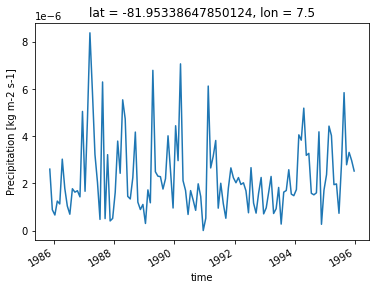

In [22]:
ds_pr1d = ds_precip.pr.isel(lat=10, lon=10)
ds_pr1d.plot()

In [23]:
ds_press

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 240, lon: 480, time: 122)
Coordinates:
  * time       (time) datetime64[ns] 1985-11-16 ... 1995-12-16T12:00:00
  * lat        (lat) float64 -89.43 -88.68 -87.94 -87.19 ... 87.94 88.68 89.43
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1985-11-01 1985-12-01 ... 1996-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.08 -89.08 ... 89.08 89.08 90.0
    lon_bnds   (lon, bnds) float64 -0.375 0.375 0.375 ... 358.9 358.9 359.6
    ps         (time, lat, lon) float32 ...
Attributes:
    institution:                     CMCC - Centro Euro-Mediterraneo per i Ca...
    institute_id:                    CMCC
    experiment_id:                   decadal1985
    source:                          CMCC-CM
    model_id:                        CMCC-CM
    forcing:                         Nat,Ant,GHG,SA,TO,Sl
    parent_experiment_id:            N/A
    parent_experiment_rip:           N/A
    branch_time:                     0.0
    contact:                         Silvio Gualdi (gualdi@bo.ingv.it)
    history:                         Model output postprocessed with CDO 2012...
    comment:                         The ocean is initialized with full value...
    references:                      model described in the documentation at ...
    initialization_method:           2
    physics_version:                 1
    tracking_id:                     2109cd31-7789-4172-aec6-2173976f57aa
    product:                         output
    experiment:                      10- or 30-year run initialized in year 1985
    frequency:                       mon
    creation_date:                   2012-03-22T15:30:14Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) a5a1c518f52ae...
    title:                           CMCC-CM model output prepared for CMIP5 ...
    parent_experiment:               N/A
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.7.1
    DODS_EXTRA.Unlimited_Dimension:  time

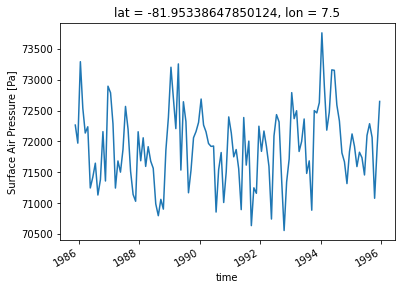

In [25]:
ds_ps1d = ds_press.ps.isel(lat=10, lon=10)
ds_ps1d.plot()

In [33]:
ds_sfct

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 240, lon: 480, time: 122)
Coordinates:
  * time       (time) datetime64[ns] 1985-11-16 ... 1995-12-16T12:00:00
  * lat        (lat) float64 -89.43 -88.68 -87.94 -87.19 ... 87.94 88.68 89.43
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    institution:                     CMCC - Centro Euro-Mediterraneo per i Ca...
    institute_id:                    CMCC
    experiment_id:                   decadal1985
    source:                          CMCC-CM
    model_id:                        CMCC-CM
    forcing:                         Nat,Ant,GHG,SA,TO,Sl
    parent_experiment_id:            N/A
    parent_experiment_rip:           N/A
    branch_time:                     0.0
    contact:                         Silvio Gualdi (gualdi@bo.ingv.it)
    history:                         Model output postprocessed with CDO 2012...
    comment:                         The ocean is initialized with full value...
    references:                      model described in the documentation at ...
    initialization_method:           2
    physics_version:                 1
    tracking_id:                     5ee5a95f-1f9b-4de9-b367-e7d33b82a9c1
    product:                         output
    experiment:                      10- or 30-year run initialized in year 1985
    frequency:                       mon
    creation_date:                   2012-03-22T15:29:34Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) a5a1c518f52ae...
    title:                           CMCC-CM model output prepared for CMIP5 ...
    parent_experiment:               N/A
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.7.1
    DODS_EXTRA.Unlimited_Dimension:  time

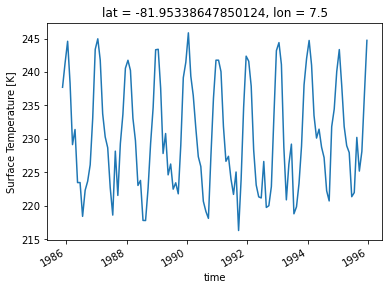

In [34]:
ds_sf1d = ds_sfct.ts.isel(lat=10, lon=10)
ds_sf1d.plot()

In [29]:
ds_geop

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 240, lon: 480, plev: 17, time: 122)
Coordinates:
  * time       (time) datetime64[ns] 1985-11-16 ... 1995-12-16T12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * lat        (lat) float64 -89.43 -88.68 -87.94 -87.19 ... 87.94 88.68 89.43
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1985-11-01 1985-12-01 ... 1996-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.08 -89.08 ... 89.08 89.08 90.0
    lon_bnds   (lon, bnds) float64 -0.375 0.375 0.375 ... 358.9 358.9 359.6
    zg         (time, plev, lat, lon) float32 ...
Attributes:
    institution:                     CMCC - Centro Euro-Mediterraneo per i Ca...
    institute_id:                    CMCC
    experiment_id:                   decadal1985
    source:                          CMCC-CM
    model_id:                        CMCC-CM
    forcing:                         Nat,Ant,GHG,SA,TO,Sl
    parent_experiment_id:            N/A
    parent_experiment_rip:           N/A
    branch_time:                     0.0
    contact:                         Silvio Gualdi (gualdi@bo.ingv.it)
    history:                         Model output postprocessed with CDO 2012...
    comment:                         The ocean is initialized with full value...
    references:                      model described in the documentation at ...
    initialization_method:           2
    physics_version:                 1
    tracking_id:                     274badc3-53fd-4c73-a192-e04bb32027f8
    product:                         output
    experiment:                      10- or 30-year run initialized in year 1985
    frequency:                       mon
    creation_date:                   2012-03-22T15:29:53Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) a5a1c518f52ae...
    title:                           CMCC-CM model output prepared for CMIP5 ...
    parent_experiment:               N/A
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.7.1
    DODS_EXTRA.Unlimited_Dimension:  time

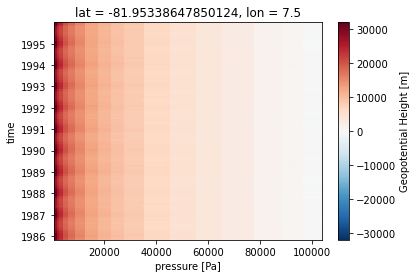

In [39]:
ds_ge1d = ds_geop.zg.isel(lat=10, lon=10)
ds_ge1d.plot()

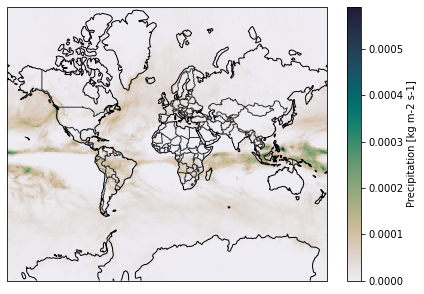

In [41]:
fig = plt.figure()
xx, yy = np.meshgrid(ds_precip.lon, ds_precip.lat)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=ccrs.Mercator())
mappable = ax.pcolormesh(xx, yy, ds_precip.pr[1,:,:], cmap = cmo.rain, transform = ccrs.PlateCarree())
cbar = fig.colorbar(mappable)
cbar.set_label('Precipitation [kg m-2 s-1]')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='0.2')

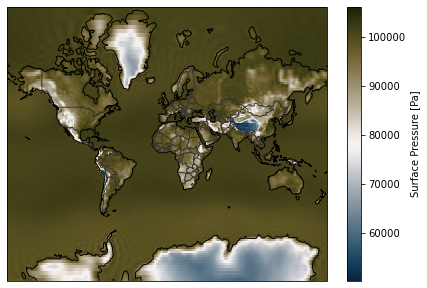

In [43]:
fig = plt.figure()
xx, yy = np.meshgrid(ds_press.lon, ds_press.lat)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=ccrs.Mercator())
mappable = ax.pcolormesh(xx, yy, ds_press.ps[1,:,:], cmap = cmo.diff, transform = ccrs.PlateCarree())
cbar = fig.colorbar(mappable)
cbar.set_label('Surface Pressure [Pa]')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='0.2')

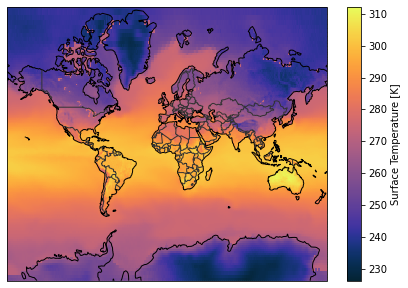

In [46]:
fig = plt.figure()
xx, yy = np.meshgrid(ds_sfct.lon, ds_sfct.lat)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=ccrs.Mercator())
mappable = ax.pcolormesh(xx, yy, ds_sfct.ts[1,:,:], cmap = cmo.thermal, transform = ccrs.PlateCarree())
cbar = fig.colorbar(mappable)
cbar.set_label('Surface Temperature [K]')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='0.2')

In [48]:
ds_geop.zg.plev

<xarray.DataArray 'plev' (plev: 17)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

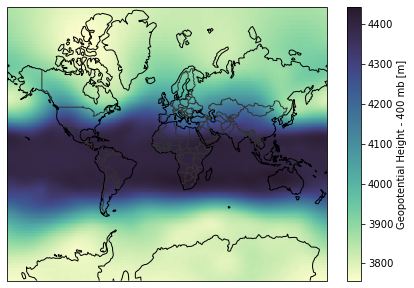

In [50]:
fig = plt.figure()
xx, yy = np.meshgrid(ds_geop.lon, ds_geop.lat)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=ccrs.Mercator())
mappable = ax.pcolormesh(xx, yy, ds_geop.zg[1,4,:,:], cmap = cmo.deep, transform = ccrs.PlateCarree())
cbar = fig.colorbar(mappable)
cbar.set_label('Geopotential Height - 400 mb [m]')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='0.2')